In [137]:
# Libraries
import os
from datetime import datetime, date, timedelta
from typing import Dict, List, Tuple, Union
from pathlib import Path
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [141]:
class dataops():
    def __init__(self)->None:
        """"""
        pass

    def set_path(self,
                downlods_path:Path[Union, str],
                metafilename:str,
                netcdffilename:str)-> None:
                #Setting the path and loading the datasets
                # downlods_path = Path(r"c:\\Users\\vardh\\OneDrive - University of Leicester\\OCF\\Git_repos\\downloads")
                self.dl_path = downlods_path
                self.uk_pv_meta_path = Path(os.path.join(self.dl_path, metafilename))
                self.uk_pv_netcdf_path = Path(os.path.join(self.dl_path, netcdffilename)) 
    
    def load_data(self)->None:
        self.metadata_df = pd.read_csv(self.uk_pv_meta_path.as_posix())
        dataops.pv_power = xr.open_dataset(self.uk_pv_netcdf_path.as_posix(), engine="h5netcdf")

if __name__ == "__main__":
    dops = dataops()
    dops.set_path(downlods_path = r"c:\\Users\\vardh\\OneDrive - University of Leicester\\OCF\\Git_repos\\downloads",
                metafilename = "uk_pv_metadata.csv",
                netcdffilename = "uk_pv_netcdf.netcdf")
    dops.load_data()

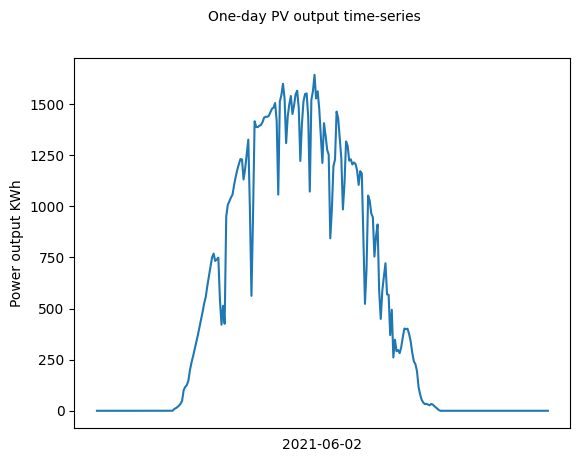

In [153]:
class xr_df():
    def __init__(self):
        """"""
        pass
    
    def xr_to_df(self,
                ssid:str,
                date_oi:str)-> None:
                self.date_oi = date_oi
                self.date_1 = datetime.strptime(self.date_oi, '%Y-%m-%d')
                self.next_day = self.date_1+timedelta(days=1)
                self.on_pv_system = dataops.pv_power[ssid].to_dataframe()
                self.on_pv_system = self.on_pv_system[(self.on_pv_system.index < self.next_day)&(self.on_pv_system.index > date_oi)]
                # print(ssid)
                # print(self.on_pv_system)
    
    def display(self):
        fig = plt.figure()
        plt.plot(self.on_pv_system)
        fig.suptitle("One-day PV output time-series", fontsize = 10)
        plt.ylabel('Power output KWh', fontsize = 10)
        plt.xlabel(self.date_oi, fontsize = 10)
        plt.xticks([])

if __name__=="__main__":
    xrdf = xr_df()
    xrdf.xr_to_df(ssid="10003", date_oi="2021-06-02")
    xrdf.display()
